# Statistics in Machine Learning 2 - Spread and Dispersion

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Range, Variance, Standard Deviation and IQR (Inter-Quartile Range)

1. Why Dispersion Matters

Think of dispersion as how “spread out” the data is.

Two datasets can have the same mean but look very different:
- Dataset A: 10, 10, 10, 10, 10 (mean = 10, no spread)
- Dataset B: 5, 8, 10, 12, 15 (mean = 10, wide spread)

Question for you: If both have the same mean, which dataset would be harder to predict the next value from — A or B?

2. Measures of Spread

    a) Range

        - Formula: max – min
        - Example: In B above → 15 – 5 = 10
        - Very sensitive to outliers (if one number jumps to 100, range = 95).
    
    b) Variance & Standard Deviation

        - Variance = average squared distance from the mean.
        - Standard deviation = square root of variance (brings units back to original).
        - They use all data points, so they’re more “stable” than range but still affected by outliers.

    c) Interquartile Range (IQR)

        - IQR = Q3 – Q1 (spread of the middle 50% of data).
        - Less sensitive to outliers, because it ignores the lowest 25% and highest 25%.
        - Often used in boxplots and to define outliers.

3. Outliers and Their Impact

- Range: explodes if even one extreme value appears.
- Variance & SD: pulled upward, because squaring exaggerates large deviations.
- IQR: relatively unaffected — it only cares about the middle 50%.

Dataset 1 (no outlier):
$$10,12,13,15,18$$

- Range = max – min = $18−10=8$
- Mean = 13.6
- Variance (average squared deviation): ≈ 8.3
- Standard Deviation (SD) = $\sqrt{8.3} ≈ 2.9$
- IQR = Q3 – Q1 = $(15 – 12) = 3$

Dataset 2 (add an outlier = 40):
$$10,12,13,15,18,40$$
- Range = $40–10=30$ ⬆ big jump
- Mean = 18
- Variance ≈ 129.6
- SD = √129.6 ≈ 11.4 ⬆ inflated
- IQR = (18 – 12.5) = 5.5 ⬆ only slightly

Key Insight
- Range exploded from 8 → 30
- SD jumped from ~3 → ~11
- IQR only moved from 3 → 5.5

👉 So, IQR is least affected by outliers, while Range & SD are heavily distorted.

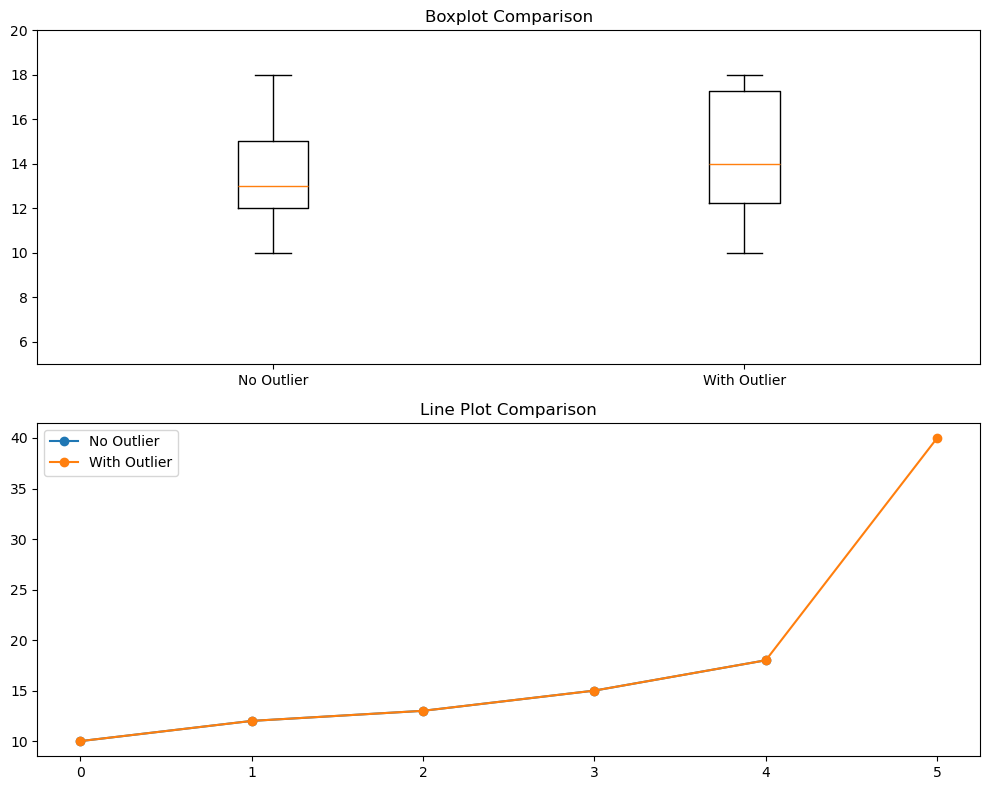

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset without outlier
data1 = [10, 12, 13, 15, 18]

# Dataset with outlier
data2 = [10, 12, 13, 15, 18, 40]

# --- Boxplots ---
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.boxplot([data1, data2], tick_labels=["No Outlier", "With Outlier"])
plt.title("Boxplot Comparison")
plt.ylim(5, 20)

# --- Line plot (to see actual data points) ---
plt.subplot(2,1,2)
plt.plot(data1, "o-", label="No Outlier")
plt.plot(data2, "o-", label="With Outlier")
plt.title("Line Plot Comparison")
plt.legend()

plt.tight_layout()
plt.show()


Dataset 1 (No Outlier):
  Range = 8
  Standard Deviation = 2.73
  IQR = 3.0

Dataset 2 (With Outlier):
  Range = 30
  Standard Deviation = 10.15
  IQR = 5.0



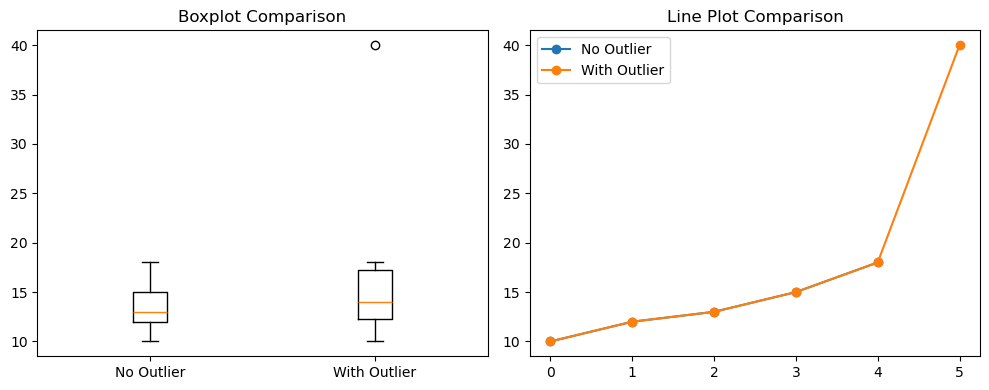

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset without outlier
data1 = [10, 12, 13, 15, 18]

# Dataset with outlier
data2 = [10, 12, 13, 15, 18, 40]

def summary_stats(data):
    data = np.array(data)
    r = data.max() - data.min()
    sd = np.std(data, ddof=0)  # population SD
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    return r, sd, iqr

# Calculate stats
r1, sd1, iqr1 = summary_stats(data1)
r2, sd2, iqr2 = summary_stats(data2)

print("Dataset 1 (No Outlier):")
print(f"  Range = {r1}")
print(f"  Standard Deviation = {sd1:.2f}")
print(f"  IQR = {iqr1}\n")

print("Dataset 2 (With Outlier):")
print(f"  Range = {r2}")
print(f"  Standard Deviation = {sd2:.2f}")
print(f"  IQR = {iqr2}\n")

# --- Boxplots ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot([data1, data2], tick_labels=["No Outlier", "With Outlier"])
plt.title("Boxplot Comparison")

# --- Line plot ---
plt.subplot(1,2,2)
plt.plot(data1, "o-", label="No Outlier")
plt.plot(data2, "o-", label="With Outlier")
plt.title("Line Plot Comparison")
plt.legend()

plt.tight_layout()
plt.show()


- IQR is the most reliable to describe the spread for data2, because it only looks at the middle 50%.
- SD is better than range, but not as robust as IQR.

Here’s a simple way to think of it:
- Range → “most fragile” (blows up with one extreme value).
- Standard Deviation → “balanced, but sensitive” (good when data is fairly normal, not many outliers).
- IQR → “robust” (stays stable even with outliers).

Alright — here’s a rule of thumb you can keep in mind:

**When to use Standard Deviation (SD)**

- Data is roughly symmetric (like bell-shaped, normal-ish).
- No extreme outliers.
- You want to describe how far values typically are from the mean.
- Example: test scores in a big class, heights of people.

**When to use IQR**

- Data is skewed or has outliers.
- You care about the “typical” middle spread.
- Example: incomes in a city (some billionaires distort SD!), housing prices.

✨ Shortcut memory trick:
- SD = Symmetric Data
- IQR = Outliers or Skew

So to wrap this section up:
- Range → very sensitive to extremes.
- SD → best when data is symmetric/normal.
- IQR → best when data is skewed or has outliers.

Here are three small datasets (all have mean ≈ 50):

- A: 49, 50, 51, 50, 50
- B: 40, 45, 50, 55, 60
- C: 10, 45, 50, 55, 200

Since dataset A is very tight and symmetric, both SD and Range would describe it well.
- Range = small, shows values are close together.
- SD = also small, confirms there’s very little variation.
- IQR wouldn’t add much here, since there are no outliers or skew.

So SD (or range) is a solid choice.

Dataset B is spread out more than A, but it’s still nice and symmetric.

- Range shows the full spread (60 – 40 = 20).
- SD gives a smoother sense of “typical distance from the mean.”
- IQR isn’t wrong, but since there’s no skew or outliers, SD (or even range) is more informative.

Dataset C has a huge outlier (200).

- Range = 200 – 10 = 190 → completely distorted by the outlier.
- SD → also inflated, because squaring that large deviation exaggerates it.
- IQR → focuses on the middle 50% (45–55), so it reflects the typical values without being pulled by 10 or 200.

This is a classic example of why IQR is preferred when outliers exist.

| Measure                       | How it’s Calculated                     | Sensitive to Outliers? | Best Used When                                    |
| ----------------------------- | --------------------------------------- | ---------------------- | ------------------------------------------------- |
| **Range**                     | max – min                               | Very sensitive         | Small, clean datasets; quick estimate             |
| **Variance**                  | Average of squared deviations from mean | Sensitive              | Symmetric/normal data; when you need SD           |
| **Standard Deviation (SD)**   | √Variance                               | Sensitive              | Symmetric/normal data; typical “spread from mean” |
| **Interquartile Range (IQR)** | Q3 – Q1 (middle 50%)                    | Robust                 | Skewed data or datasets with outliers             |


💡 Quick memory trick:
- SD & Variance → Symmetric Data
- IQR → Skewed or Outliers
- Range → Quick glance, fragile

## IQR Outliers

1. How it works

    1. Compute Q1 (25th percentile) and Q3 (75th percentile).
    2. Compute IQR = Q3 – Q1.
    3. Define the outlier boundaries:
    $$Lower bound=Q1−1.5×IQR$$
    $$Upper bound=Q3+1.5×IQR$$

- Any data points outside these bounds are considered outliers.

2. Example

Dataset: 10, 12, 13, 15, 18, 40
- Q1 = 12, Q3 = 18 → IQR = 6
- Lower bound = 12 – 1.5×6 = 3
- Upper bound = 18 + 1.5×6 = 27

✅ Outlier: 40 (above 27)

Notice how IQR naturally ignores extreme low/high points and gives a rule for outliers.

In [14]:
# Cell 2: Define the outlier detection function
def detect_outliers_iqr(data, columns=None, multiplier=1.5):
    """
    Detect outliers using the IQR (Interquartile Range) method.
    
    Parameters:
    -----------
    data : array-like, pandas Series, or pandas DataFrame
        Input data to check for outliers
    columns : list, optional
        Specific columns to check (only for DataFrame input)
    multiplier : float, default=1.5
        IQR multiplier for outlier bounds (1.5 is standard, 3.0 for extreme outliers)
    
    Returns:
    --------
    dict containing:
        - 'outlier_indices': indices of outlier values
        - 'outlier_values': the actual outlier values
        - 'bounds': lower and upper bounds used
        - 'stats': Q1, Q3, and IQR values
    """
    
    # Handle different input types
    if isinstance(data, pd.DataFrame):
        if columns is None:
            columns = data.select_dtypes(include=[np.number]).columns.tolist()
        
        results = {}
        for col in columns:
            results[col] = _detect_outliers_single(data[col].values, multiplier)
        return results
    
    elif isinstance(data, pd.Series):
        return _detect_outliers_single(data.values, multiplier)
    
    else:
        # Assume array-like
        return _detect_outliers_single(np.array(data), multiplier)


def _detect_outliers_single(arr, multiplier):
    """Helper function to detect outliers in a single array."""
    # Remove NaN values
    clean_data = arr[~np.isnan(arr)]
    
    # Calculate quartiles and IQR
    q1 = np.percentile(clean_data, 25)
    q3 = np.percentile(clean_data, 75)
    iqr = q3 - q1
    
    # Calculate bounds
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    
    # Find outliers
    outlier_mask = (arr < lower_bound) | (arr > upper_bound)
    outlier_indices = np.where(outlier_mask)[0]
    outlier_values = arr[outlier_indices]
    
    return {
        'outlier_indices': outlier_indices,
        'outlier_values': outlier_values,
        'bounds': {'lower': lower_bound, 'upper': upper_bound},
        'stats': {'Q1': q1, 'Q3': q3, 'IQR': iqr},
        'count': len(outlier_indices)
    }

print("✓ Functions loaded successfully!")

✓ Functions loaded successfully!


In [16]:
# Cell 3: Example 1 - Simple list/array
print("=" * 60)
print("EXAMPLE 1: Simple List")
print("=" * 60)

data = [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 100, 12, 14, 13]
result = detect_outliers_iqr(data)

print(f"\nOriginal data: {data}")
print(f"\nOutliers found: {result['outlier_values']}")
print(f"At indices: {result['outlier_indices']}")
print(f"Lower bound: {result['bounds']['lower']:.2f}")
print(f"Upper bound: {result['bounds']['upper']:.2f}")
print(f"Q1: {result['stats']['Q1']:.2f}, Q3: {result['stats']['Q3']:.2f}, IQR: {result['stats']['IQR']:.2f}")


EXAMPLE 1: Simple List

Original data: [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 100, 12, 14, 13]

Outliers found: [100]
At indices: [11]
Lower bound: 8.50
Upper bound: 16.50
Q1: 11.50, Q3: 13.50, IQR: 2.00


In [17]:
# Cell 4: Example 2 - DataFrame with multiple columns
print("\n" + "=" * 60)
print("EXAMPLE 2: DataFrame with Multiple Columns")
print("=" * 60)

df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 100, 3, 2, 4],
    'B': [10, 11, 12, 13, 14, 15, 16, 200, 12],
    'C': [5, 5, 5, 6, 6, 7, 7, 8, 8]
})

print("\nOriginal DataFrame:")
print(df)

results = detect_outliers_iqr(df)

print("\n" + "-" * 60)
for col, result in results.items():
    print(f"\nColumn '{col}':")
    print(f"  Outliers: {result['outlier_values']}")
    print(f"  Outlier count: {result['count']}")
    print(f"  Bounds: [{result['bounds']['lower']:.2f}, {result['bounds']['upper']:.2f}]")
    print(f"  Q1={result['stats']['Q1']:.2f}, Q3={result['stats']['Q3']:.2f}, IQR={result['stats']['IQR']:.2f}")





EXAMPLE 2: DataFrame with Multiple Columns

Original DataFrame:
     A    B  C
0    1   10  5
1    2   11  5
2    3   12  5
3    4   13  6
4    5   14  6
5  100   15  7
6    3   16  7
7    2  200  8
8    4   12  8

------------------------------------------------------------

Column 'A':
  Outliers: [100]
  Outlier count: 1
  Bounds: [-1.00, 7.00]
  Q1=2.00, Q3=4.00, IQR=2.00

Column 'B':
  Outliers: [200]
  Outlier count: 1
  Bounds: [7.50, 19.50]
  Q1=12.00, Q3=15.00, IQR=3.00

Column 'C':
  Outliers: []
  Outlier count: 0
  Bounds: [2.00, 10.00]
  Q1=5.00, Q3=7.00, IQR=2.00



VISUALIZATION: Boxplot


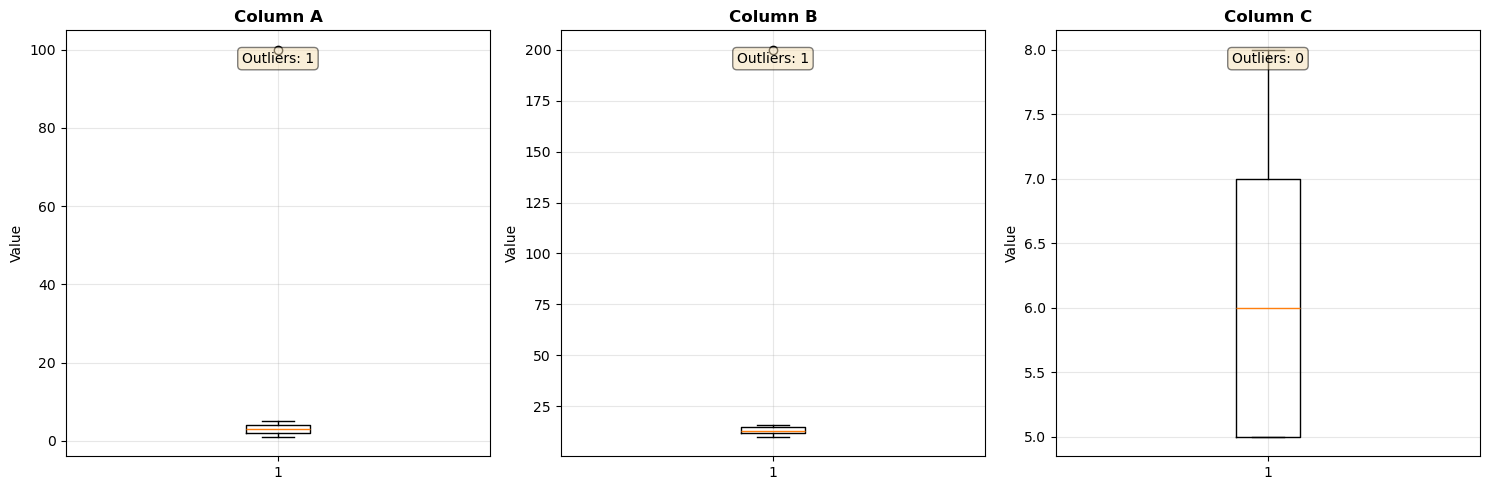

In [18]:
# Cell 5: Visualization - Boxplot
print("\n" + "=" * 60)
print("VISUALIZATION: Boxplot")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(df.columns):
    ax = axes[idx]
    ax.boxplot(df[col], vert=True)
    ax.set_title(f'Column {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
    
    # Add outlier count
    outlier_count = results[col]['count']
    ax.text(0.5, 0.95, f'Outliers: {outlier_count}', 
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [19]:
# Cell 6: Using your own data
print("\n" + "=" * 60)
print("USE WITH YOUR OWN DATA")
print("=" * 60)
print("""
# Replace this with your own dataset:

# For a simple list or array:
# my_data = [your, data, here]
# result = detect_outliers_iqr(my_data)
# print(result)

# For a DataFrame:
# df = pd.read_csv('your_file.csv')  # or create your own DataFrame
# results = detect_outliers_iqr(df)
# 
# Or check specific columns only:
# results = detect_outliers_iqr(df, columns=['column1', 'column2'])

# For extreme outliers only (less sensitive):
# results = detect_outliers_iqr(df, multiplier=3.0)
""")


USE WITH YOUR OWN DATA

# Replace this with your own dataset:

# For a simple list or array:
# my_data = [your, data, here]
# result = detect_outliers_iqr(my_data)
# print(result)

# For a DataFrame:
# df = pd.read_csv('your_file.csv')  # or create your own DataFrame
# results = detect_outliers_iqr(df)
# 
# Or check specific columns only:
# results = detect_outliers_iqr(df, columns=['column1', 'column2'])

# For extreme outliers only (less sensitive):
# results = detect_outliers_iqr(df, multiplier=3.0)



In [21]:
# Alternative simpler function for quick outlier detection in numeric DataFrame columns
def detect_outliers_iqr(df, multiplier=1.5):
    """
    Detects outliers in all numeric columns of a DataFrame using IQR.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        multiplier (float): Scaling factor for IQR (default=1.5)
    
    Returns:
        dict: Column-wise outliers indices
    """
    outliers = {}
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Find outlier indices
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices.tolist()
    
    return outliers

# Example usage
data = {
    'A': [10, 12, 12, 13, 12, 11, 110],   # has an outlier (110)
    'B': [100, 102, 99, 98, 97, 103, 104] # no strong outlier
}
df = pd.DataFrame(data)

outliers = detect_outliers_iqr(df)
print(outliers)


{'A': [6], 'B': []}


🔹 Method 1: IQR Rule (non-parametric, works for skewed data)

Steps:

Find Q1 (25th percentile) and Q3 (75th percentile).

Compute IQR = Q3 – Q1.

Define “fences”:

Lower fence = Q1 – 1.5 × IQR

Upper fence = Q3 + 1.5 × IQR

Any data point outside these fences is an outlier.

👉 Advantage: Doesn’t assume normal distribution. Robust against skew.

🔹 Method 2: Z-score Rule (parametric, assumes normal-ish data)

Steps:

Compute z-score = (x – mean) / SD for each data point.

Common threshold:

|z| > 3 → outlier (sometimes 2.5).

👉 Advantage: Simple, but only makes sense if data is roughly symmetric and bell-shaped. Skew breaks this method.

⚖️ Quick comparison

IQR method → better for skewed data or when outliers distort mean/SD.

Z-score method → better when data is close to normal distribution.

💡 Mini example: Suppose exam scores are:
[50, 52, 53, 55, 56, 57, 58, 59, 60, 100]

With IQR, the 100 might get flagged because it’s far beyond Q3 + 1.5×IQR.

With Z-score, the 100 also has a very large z-value, but only if distribution is assumed symmetric.

Dataset

Scores:
[50, 52, 53, 55, 56, 57, 58, 59, 60, 100]

Notice: most scores are clustered around the 50s, but 100 looks suspicious.

🔹 Step 1: IQR Method

Order the data (already sorted).

Find quartiles:

Q1 = 53

Q3 = 59

IQR = Q3 – Q1 = 59 – 53 = 6

Fences:

Lower = 53 – (1.5 × 6) = 44

Upper = 59 + (1.5 × 6) = 68

Outliers = values outside [44, 68] → 100 is flagged.

🔹 Step 2: Z-score Method

Mean = (sum / n) = 600 / 10 = 60

SD ≈ 14.1 (the 100 inflates SD).

Compute z-scores:

For 100: z = (100 – 60) / 14.1 ≈ +2.83

For others: most are between –0.7 and +0.3.

Threshold: |z| > 3 → outlier.

100 has z = 2.83 → NOT flagged if using strict |z|>3 rule.

🔹 Comparison

IQR Method: flags 100 as outlier.

Z-score Method: does not flag it, because the large SD “dilutes” the extremeness.


⚖️ When to Use

IQR method:

Best for skewed or non-normal data.

Resistant to distortion from extreme values.

Z-score method:

Best for normal-like data where mean & SD are reliable.

Outlier detection is relative to “bell curve” assumptions.

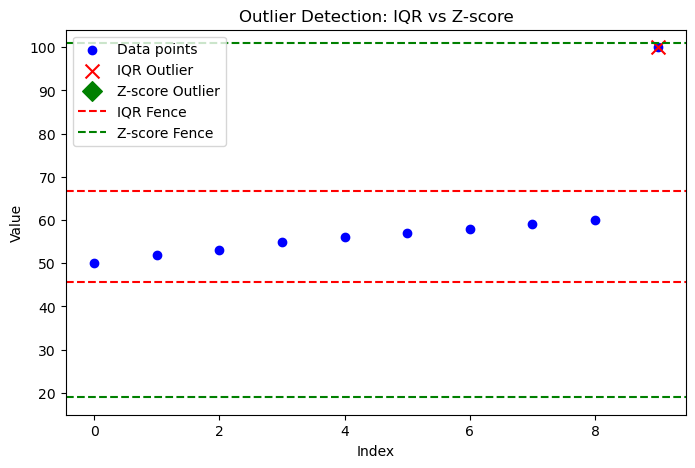

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Dataset
data = np.array([50, 52, 53, 55, 56, 57, 58, 59, 60, 100])
df = pd.DataFrame(data, columns=['value'])

# --- IQR Method ---
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# --- Z-score Method ---
z_scores = stats.zscore(data)
z_threshold = 3  # typical cutoff

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))

# Plot data points
ax.scatter(range(len(data)), data, color='blue', label='Data points')

# Highlight IQR outliers
iqr_outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
ax.scatter(iqr_outliers, data[iqr_outliers], color='red', s=100, marker='x', label='IQR Outlier')

# Highlight Z-score outliers
z_outliers = np.where(np.abs(z_scores) > z_threshold)[0]
ax.scatter(z_outliers, data[z_outliers], color='green', s=100, marker='D', label='Z-score Outlier')

# Add IQR fences
ax.axhline(lower_bound, color='red', linestyle='--', label='IQR Fence')
ax.axhline(upper_bound, color='red', linestyle='--')

# Add Z-score fences (mean ± 3σ)
mean = np.mean(data)
std = np.std(data)
ax.axhline(mean - 3*std, color='green', linestyle='--', label='Z-score Fence')
ax.axhline(mean + 3*std, color='green', linestyle='--')

# Labels
ax.set_title("Outlier Detection: IQR vs Z-score")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.legend()

plt.show()

results = {
    "IQR_outliers": data[iqr_outliers].tolist(),
    "IQR_indices": iqr_outliers.tolist(),
    "Z_outliers": data[z_outliers].tolist(),
    "Z_indices": z_outliers.tolist(),
    "IQR_bounds": (lower_bound, upper_bound),
    "Z_bounds": (mean - 3*std, mean + 3*std)
}


In [24]:
display(results)

{'IQR_outliers': [100],
 'IQR_indices': [9],
 'Z_outliers': [],
 'Z_indices': [],
 'IQR_bounds': (45.625, 66.625),
 'Z_bounds': (18.99756104815227, 101.00243895184772)}

👉 So visually and numerically, IQR catches 100 as an outlier, but Z-score does not because its cutoff is stretched by the large value.

## Shape of Distributions

Now that you know center (mean/median) and spread (SD/IQR), the third pillar is shape — how the data is distributed.

1. Symmetry vs. Skewness
- Symmetric distribution: left = right (like the normal distribution). Mean ≈ Median.
- Right-skewed (positive skew): long tail on the right. Mean > Median.
- Left-skewed (negative skew): long tail on the left. Mean < Median.

2. Kurtosis
- Describes how “peaked” or “flat” a distribution is compared to normal.
- Leptokurtic: sharp peak, heavy tails.
- Platykurtic: flat, light tails.
- Mesokurtic: normal-like.

3. Why Shape Matters
- Shape affects which measure of center and spread is most appropriate.
- Example:
    - Normal-like → mean & SD are reliable.
    - Skewed/outliers → median & IQR are better.

1. Symmetry vs. Skewness

Think of a balance scale:

If the left and right sides look the same → symmetric.

If one side drags out longer (a “tail”) → skewed.

👉 Quick check:

Symmetric: mean ≈ median.

Right-skewed: tail stretches right → mean is pulled above the median.

Left-skewed: tail stretches left → mean is pulled below the median.

Question for you: If you saw a histogram of people’s income, do you expect it to be symmetric, right-skewed, or left-skewed?

2. Kurtosis

This is less about left vs. right, and more about how “tall and skinny” or “flat and spread” the hump is, compared to a normal curve.

Leptokurtic (positive kurtosis): tall peak, heavy tails → more extreme outliers.

Platykurtic (negative kurtosis): flat, light tails → fewer outliers.

Mesokurtic: similar to normal distribution.

👉 Shortcut: Kurtosis ≈ "outlier-proneness."

3. Why Shape Matters

Shape guides which statistics we trust:

Normal-like data: mean & SD are good summaries.

Skewed or outlier-heavy data: better to use median & IQR.

Example:

Test scores in a well-designed exam → symmetric, so mean/SD are fine.

House prices → right-skewed (few very expensive ones), so median/IQR make more sense.

🔹 Symmetry

A distribution is symmetric when the left side mirrors the right side.

Example: heights of adult men in a population often look roughly symmetric.

In symmetric data → mean ≈ median ≈ mode.

👉 In practice: If your histogram looks like a “bell” centered in the middle, symmetry is likely.

🔹 Skewness

Skewness tells us if the distribution leans left or right — like a kite with one tail longer.

1. Right-skewed (positive skew)

Long tail stretches to the right (higher values).

Mean > Median (because extreme high values pull the mean up).

Examples: income, house prices.

2. Left-skewed (negative skew)

Long tail stretches to the left (lower values).

Mean < Median (because extreme low values pull the mean down).

Examples: exam scores where most did well, but a few got very low marks.

3. Symmetric (zero skew)

Tails are balanced.

Mean ≈ Median.

Example: well-designed test scores, IQ scores.

🔹 Why skewness matters

Mean is sensitive to skew.

In right-skewed data, mean is “too high” compared to most people’s values.

In left-skewed data, mean is “too low.”

Median is more robust. That’s why we often report the median income, not the mean income.

👉 Quick test for you:
If the mean salary in a company is $80,000 but the median salary is $50,000, is the distribution symmetric, right-skewed, or left-skewed?

Here’s a useful rule of thumb you can keep in mind:

Mean ≈ Median → Symmetric

Mean > Median → Right-skewed

Mean < Median → Left-skewed

🔹 Formula for Skewness